# Scientific Computing in Python

This tutorial gives a first introduction into the most important libraries for scientific computing in Python, as well as how to do some basic plotting. The tutorial assumes a basic working knowledge of Python and is intended to provide the data-scientist-to-be with some basics about the machinery that runs in the background of popular libraries for data analysis and visualization in Python.

## Numpy

With `numpy`, we will turn Python into a mathematical workbench that not only offers us the ability to make complicated algebraic computations but also to speed things up when computations in Python becomes slow. We will only scratch the surface of the capabilities of `numpy`, but with a foot in the door, it should not be too difficult to explore other features and modules of the package if needed.

Let us import `numpy` short `np`.

In [1]:
import numpy as np

### Arrays

Arrays are defined just like lists in Python, but additionally we must pass our list into the function array.

In [2]:
ar = np.array([50,60,80,100,50,200])
ar

array([ 50,  60,  80, 100,  50, 200])

Arrays can have multiple dimensions.

In [3]:
ar2d = np.array([[50,60,80,100,50,200],[70,10,20,60,90,100]])
ar2d

array([[ 50,  60,  80, 100,  50, 200],
       [ 70,  10,  20,  60,  90, 100]])

Numpy also as several functions to create placeholder arrays.

In [4]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The function `arange` is similar to Python `range` but produces an array instead of an iterator.

In [7]:
np.arange(3)

array([0, 1, 2])

In [8]:
np.arange(3,10,2)

array([3, 5, 7, 9])

The function `linspace` produces a sequence of values that are evenly spaced over an interval

In [9]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### Array Indexing and Slicing

Arrays behave very similar to lists. For example, we can apply everything that we know about slicing to arrays. 

In [10]:
ar[1]

60

In [11]:
ar[1:-1]

array([ 60,  80, 100,  50])

Like lists, arrays return a view and not a copy, which means that we can change the original data in the array.

In [12]:
ar[1:3] = [15,25]
ar

array([ 50,  15,  25, 100,  50, 200])

To select an element from an n-dimensional arrays, we must provide the index for each dimension, in this case the row index and the columns index. 

In [13]:
ar2d[1,4]

90

We can also select a row.

In [14]:
ar2d[1]

array([ 70,  10,  20,  60,  90, 100])

Or we select a column.

In [15]:
ar2d[:,1]

array([60, 10])

Both, rows and columns are slices, but other types of slices are possible, too.

In [16]:
ar2d[1,::2]

array([70, 20, 90])

A particularily powerful way of indexing is to use an array of indices to select elements of an array.

In [17]:
index = np.arange(0,6,2)
index

array([0, 2, 4])

In [18]:
ar[index]

array([50, 25, 50])

We can also index with a boolean array.

In [19]:
ar>50

array([False, False, False,  True, False,  True])

In [20]:
ar[ar>50]

array([100, 200])

More complex quereies are also possible, but we must use `&` instead of `and` and `|` instead of `or` as well as brackets for boolean array.

In [21]:
ar[(ar>40) & (ar<200)]

array([ 50, 100,  50])

#### Exercises

1. Create an array `powr` with numbers from 0 to 10, take it to the power of two, and show it in the output.

In [22]:
powr = np.arange(0,10,1)**2
powr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

2. Select every second number from that array.

In [23]:
powr[::2]

array([ 0,  4, 16, 36, 64])

3. Set all values to zero where numbers are greater than 10 and less than 50.

In [24]:
powr[(powr>10) & (powr<50)] = 0
powr

array([ 0,  1,  4,  9,  0,  0,  0,  0, 64, 81])

### Operations on Arrays

Recall that we could not simply multiply the list of widths and heights. With numpy arrays we can.

In [25]:
br = np.array([2.5,3,5,7,10,5])
ar * br

array([ 125.,   45.,  125.,  700.,  500., 1000.])

Other operators now also have a different behaviour. The `+` operator applied to a list concatenates these lists. The `+` operator applied to an array adds both arrays element-wise.

In [26]:
ar + br

array([ 52.5,  18. ,  30. , 107. ,  60. , 205. ])

In [27]:
ar + 10

array([ 60,  25,  35, 110,  60, 210])

In [28]:
ar * 10 

array([ 500,  150,  250, 1000,  500, 2000])

All math functions are also available in numpy and accept arrays as arguments.

In [29]:
np.sqrt(ar)

array([ 7.07106781,  3.87298335,  5.        , 10.        ,  7.07106781,
       14.14213562])

We can also get the transpose of the array using `.T`.

In [30]:
ar2d.T

array([[ 50,  70],
       [ 60,  10],
       [ 80,  20],
       [100,  60],
       [ 50,  90],
       [200, 100]])

To multiply the array like a matrix, we must use the dot-product.

In [31]:
ar2d.dot(ar2d.T)

array([[65000, 36200],
       [36200, 27100]])

For some operations, we must provide the axis, which is the dimension index, i.e., `axis=0` for rows, `axis=1` for columns.

In [32]:
ar2d.sum(axis=0) # sum of all rows

array([120,  70, 100, 160, 140, 300])

In [33]:
ar2d.sum(axis=1) # sum of all columns

array([540, 350])

In [34]:
ar2d.max(axis=0) # get largest element

array([ 70,  60,  80, 100,  90, 200])

In [35]:
ar2d.argmax(axis=0) # get index of largest element

array([1, 0, 0, 0, 1, 0])

#### Exercises

1. Create an array `xar` with 5 numbers in the interval $[0,2\pi]$ and show it in the output.

In [36]:
xar = np.linspace(0,2*np.pi,5)
xar

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

2. Then apply the sine function to this array, add 1 and multiply it by 5. Assign this new array to a variable names `yar`, and show it in the output.

In [37]:
yar = (np.sin(xar)+1)*5
yar

array([ 5., 10.,  5.,  0.,  5.])

3. Compute the index of the minimum and maximum values. Assign these to a tuple named `lim` and show the tuple in the output.

In [38]:
lim = np.argmin(yar), np.argmax(yar)
lim

(3, 1)

### Optional: Matrices

An alternative is to convert the 2d-array to a matrix. Matrices offer no benefit over 2d-arrays except that they provide some syntactic sugar and more predictability. Algebraic expressions can be written closer to their text book form, and multiplications are always dot products.

In [39]:
A = np.matrix(ar2d)
A

matrix([[ 50,  60,  80, 100,  50, 200],
        [ 70,  10,  20,  60,  90, 100]])

Unlike with arrays, operations on matrices are not necessaryily executed element-wise, but follow the rules of linear algebra, for example multiplication with itself: $$A A^\top$$

In [40]:
A*A.T

matrix([[65000, 36200],
        [36200, 27100]])

Since our matrix, $A$, is not a square matrix, we cannot multiply it with itself without transpose.

In [285]:
A*A

ValueError: shapes (2,6) and (2,6) not aligned: 6 (dim 1) != 2 (dim 0)

We can even form the inverse, as in $$(AA^\top)^{-1}$$

In [41]:
(A*A.T).I

matrix([[ 6.00806988e-05, -8.02553984e-05],
        [-8.02553984e-05,  1.44104997e-04]])

### Optional: Shape Manipulation

To get the dimension of a numpy array, we can look at the attribute `shape`.

In [42]:
ar2d.shape

(2, 6)

We can even change the shap of the array. The order in which the change takes place is row-wise (for a 2d array).

In [43]:
ar2d.shape = (12,)
ar2d

array([ 50,  60,  80, 100,  50, 200,  70,  10,  20,  60,  90, 100])

In [44]:
ar2d.shape = (3,4)
ar2d

array([[ 50,  60,  80, 100],
       [ 50, 200,  70,  10],
       [ 20,  60,  90, 100]])

We can also stack arrays together either row.wise or column-wise.

In [45]:
np.c_[ar2d,ar2d]

array([[ 50,  60,  80, 100,  50,  60,  80, 100],
       [ 50, 200,  70,  10,  50, 200,  70,  10],
       [ 20,  60,  90, 100,  20,  60,  90, 100]])

In [46]:
np.r_[ar2d,ar2d]

array([[ 50,  60,  80, 100],
       [ 50, 200,  70,  10],
       [ 20,  60,  90, 100],
       [ 50,  60,  80, 100],
       [ 50, 200,  70,  10],
       [ 20,  60,  90, 100]])

We just need to make sure that the dimension matches along the axis where the stacking takes place.

In [47]:
np.c_[ar2d,ar2d.T]

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Pyplot

So far we have only printed out raw numbers. Let us now turn Python into a workbench to visualize data. The number one library for this is `matplotlib` or to be more precise Pyplot, `matplotlib.pyplot`. There are other libraries for visualization that are capable of producing prettier visualizations in less code, but since most of these build on matplotlib, it is good to have some understandings of what is under the hood.

Let us begin my importing Pyplot.

In [49]:
import matplotlib.pyplot as plt

The most standard plotting function is the `plot` function, which simply draws a line through a pair of x and y coordinates.

### Line Plots

Let us create a simple line plot of the function $y=x^2$ for all integer values in the interval $[0,20)$

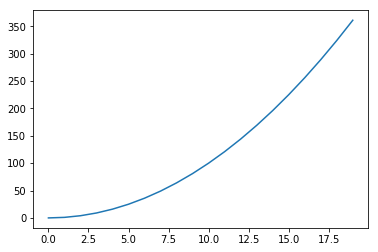

In [87]:
x = np.arange(20)
y = x**2
plt.plot(x, y)
plt.show()

#### Line Formatting

If we do not want a blue line but large red dots, we must pass a few arguments to `plot`.

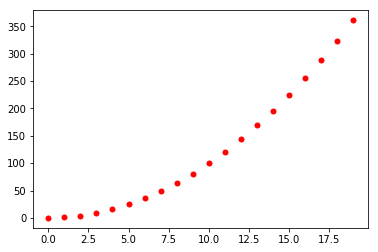

In [123]:
x = np.arange(20)
y = x**2
plt.plot(x, y, color="red", marker="o", linestyle="None", linewidth=0, markersize=5)
plt.show()

#### Axis Formatting

So far, we have no axis labels. Let us add axis labels and define the location of the ticks as well as the limits of each axis.

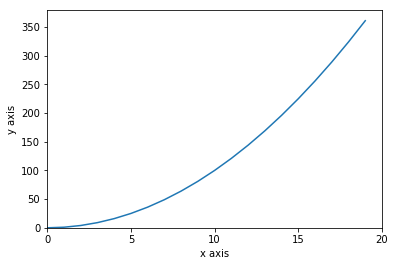

In [135]:
plt.plot(x, y)
plt.xlabel("x axis")
plt.xlim(0,20)
plt.xticks(np.arange(0,21,5))
plt.ylabel("y axis")
plt.ylim(0,)
plt.show()

#### Legend

Now suppose, we want two plots in one graph, one with a thin blue line and one with large red dots. In that case, it makes sense to add a legend.

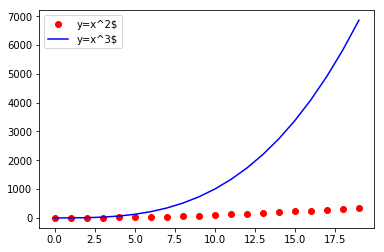

In [177]:
plt.plot(x, x**2, "ro", label="y=x^2$")
plt.plot(x, x**3, "b-", label="y=x^3$")
plt.legend(loc="best")
plt.show()

#### Subplots

Sometimes, we do not want to have all plots in one graph, but rather have separate graphs in a grid. This is possible by using `subplots`.

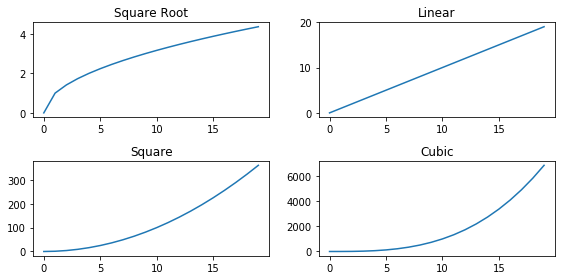

In [206]:
fig, ((a,b),(c,d)) = plt.subplots(2, 2, figsize=(8,4))
a.plot(x, x**0.5)
b.plot(x, x**1)
c.plot(x, x**2)
d.plot(x, x**3)
a.set_title("Square Root")
b.set_title("Linear")
c.set_title("Square")
d.set_title("Cubic")
fig.tight_layout()
plt.show()

#### Exercises

1. Plot the sine function in the interval $[0,2\pi]$ over $[-1,1]$ as a black line, and use only five x ticks that are equally space over the interval.

2. Create two subplots in one row, with sine on the left and cosine on the right. Use the same axis formatting as before and add a title for each plot. 

### Optional: Scatter Plots

By default scatter plots do nothing else then line plots with markers.

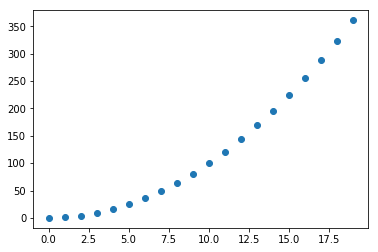

In [268]:
plt.scatter(x, x**2)
plt.show()

They can be used to include more information about data, as we can change the color and size of the marker for each point quite easily.

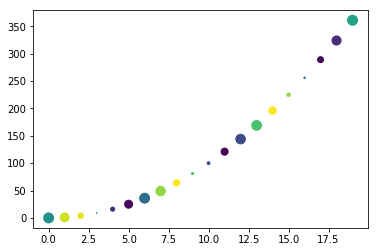

In [269]:
plt.scatter(x, x**2, c=np.sin(x)+5, s=np.cos(x)*50+50)

### Optional: Bar Charts

When we have labels, line and scatter plots make little sense, since labels have no natural order. In this case bar charts might be the better way to visualize data.

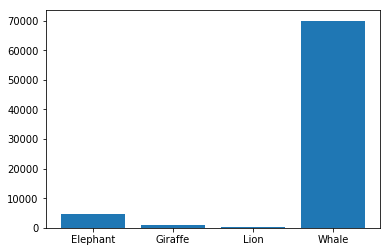

In [270]:
labels = "Elephant", "Giraffe", "Lion", "Whale"
weights = 4800, 800, 175, 70000
plt.bar(labels, weights)
plt.show()

### Optional: Pie Charts

If we want to display numerical proportions of a variable, pie charts are a popular choice.

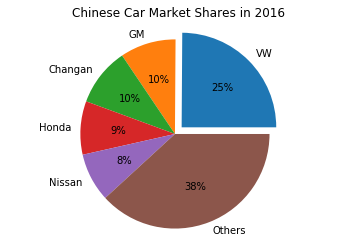

In [272]:
labels = "VW", "GM", "Changan", "Honda", "Nissan", "Others"
sizes = 3000, 1150, 1200, 1100, 1000, 4600
explode = (0.1, 0., 0, 0,0,0) #only explode the VW slice
plt.pie(sizes, explode, labels, autopct='%1.f%%')
plt.axis('equal')  # equal ensures that pie chart is a circle
plt.title("Chinese Car Market Shares in 2016")
plt.show()